(-0.1, 1.1)

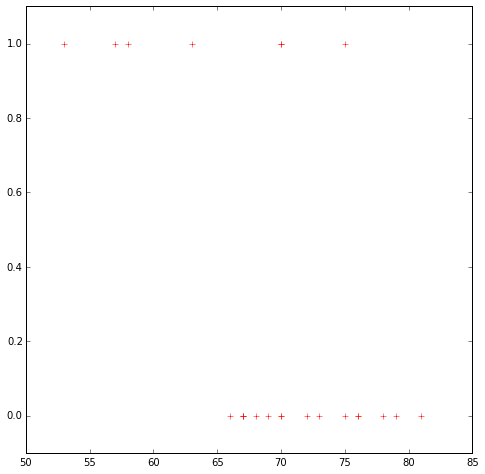

In [57]:
"""
Begin by importing the basic libraries.
Here are a couple to get you started...
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import numpy.random

"""
Read in the data from chall.txt
Plot the data
"""
datafile = np.loadtxt("../data/chall.txt")

temp = datafile[:,0]
fail = datafile[:,1]

plt.figure(1, figsize=(8,8))
plt.plot(temp, fail, 'r+')
plt.ylim(-0.1, 1.1)

### Your code here ###

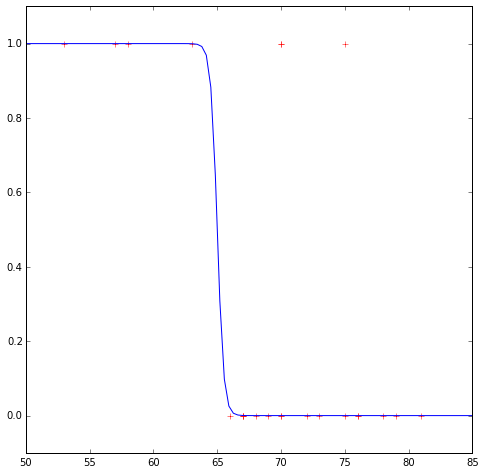

In [30]:
def logit_func(theta1, theta2, t_in):
    """
    Define the logistic function and it's input params
    """
    z= theta1+theta2*t_in
    out = 1./(1. + np.exp(-z)) 
    return out

## Now overplot the logit_func onto your figure of the data
theta1 = 260. #scaling the function, we want the halfway point of the function to be at 65 (halfway of x axis)
theta2 = -4.0

temp = datafile[:,0]
fail = datafile[:,1]

plt.figure(1, figsize=(8,8))
plt.plot(temp, fail, 'r+')
plt.ylim(-0.1, 1.1)

tnew = np.linspace(50, 85, num = 100)
logit_test = logit_func(theta1, theta2, tnew)

plt.plot(tnew, logit_test, 'b-')

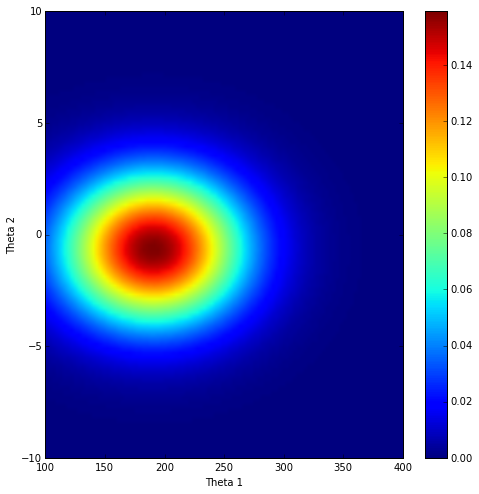

In [55]:
"""
Explain your choice of priors
Plot the regression parameter priors

We used a normal distribution and chose a large standard deviation to cover more of the parameter space. 
"""

def prior_func(theta1, theta2):
    sigma1 = 50.0 #standard deviation in sigma1 direction
    sigma2 = 5.0 
    part1 = 1./np.sqrt(2.0*np.pi)*np.exp(-(theta1 - 260.0)**2/sigma1**2) #def of normal function for sigma1 and theta1
    part2 = 1./np.sqrt(2.0*np.pi)*np.exp(-(theta2 + 4)**2/sigma2**2) #same for sigma2 and theta2
    output = part1*part2
    return output

theta11 = np.linspace(100., 400., num = 100) #our theta1 above is 260
theta21 = np.linspace(-10., 10., num = 100) #theta2 above is -4

theta1g, theta2g = np.meshgrid(theta11, theta21) #same as double for loop, iterating through gives all points on grid

prior_mat = np.zeros((len(theta11), len(theta21)))
for i in range(0, len(theta11)):
    for j in range(0, len(theta21)):
        new_prior = prior_func(theta11[i], theta21[j])
        prior_mat[i, j] = new_prior

    
### 2D prior plot
plt.figure(2, figsize = (8,8))
plt.clf() #clear figure
plt.hold(True) #hold figure to plot something else over it
plt.imshow(prior_mat)
plt.imshow(prior_mat, extent = [theta11[0], theta11[-1], theta21[0], theta21[-1]], aspect = 'auto')
plt.colorbar()
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')



In [67]:
def mylikelihood(theta1, theta2, temperature, failures):
    predictedz = theta1 + theta2*temperature 
    predictedfail = 1.0/(1.0 + np.exp(-predictedz)) #difference between data points and points predicted by model
    
    likelihdlist =    #Bernoulli Distribution
    
    #1.0/np.sqrt(2.0*np.pi)*np.exp(-(predictedfail - failures)**2/2.0)
    likelihd = likelihdlist.prod()
    return likelihd
    

In [72]:
theta1 = 314.0
theta2= -5.2

while(True):
    
    current_pos = mylikelihood(theta1, theta2, temp, fail)*prior_func(theta1, theta2)
    
    newang = np.random.rand()*2*np.pi #random angle in the plane
    
    inc_theta1 = np.cos(newu) #length of step along axis
    inc_theta2 = np.sin(newu) #length of step along axis
    
    new_theta1 = theta1 + inc_theta1
    new_theta2 = theta2 + inc_theta2
    
    new_pos = mylikelihood(new_theta1, new_theta2, temp, fail)*prior_func(new_theta1, new_theta2) #new posterior
    
    newu = np.random.rand()
    if newu < np.min([1.0, new_pos/current_pos]):
        theta1 = new_theta1
        theta2 = new_theta2 #stay at the coordinate randomly thrown
    else:
        theta1 = theta2
        theta2 = theta2 #
    
    break 